In [4]:
import os
from glob import glob

import numpy as np
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.decomposition import PCA
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16

import matplotlib.pyplot as plt

plt.rcParams["axes.unicode_minus"] = False

### data load

In [5]:
small_size = 100
makes = np.random.choice(glob(f"C:/images/{4}/*"), small_size, replace=False)  # 7, 5, 4
crawls = np.random.choice(glob(f"C:/add_crawling/{2}/*"), small_size, replace=False)

### use vgg16

- computer에 편한 output이라는 걸 깜빡했음.
- 즉, 시각화하긴 어렵다는 뜻. 물론 feature 수를 제한하는 층을 두고, 다시 학습시키면 되지만, 그러면 전이 학습의 이유가 많이 사라지는 걸.

In [6]:
# makes_images = [cv2.imread(address) for address in makes]
# makes_shape = makes_images[0].shape

# conv = VGG16(weights="imagenet", include_top=False, input_shape=makes_shape)
# conv.trainable = False

# for idx in range(small_size):
#     image = img_to_array(makes_images[idx])
#     image = preprocess_input(image.reshape((1, image.shape[0],image.shape[1],image.shape[2])))
#     makes_images[idx] = np.reshape(conv.predict(image), (conv.output_shape[1] * conv.output_shape[2] * conv.output_shape[3]))
# makes_shape = conv.output_shape[1:]

In [8]:
# crawl_images = [cv2.imread(address) for address in crawls]
# crawl_shape = crawl_images[0].shape

# conv = VGG16(weights="imagenet", include_top=False, input_shape=crawl_shape)
# conv.trainable = False

# for idx in range(small_size):
#     image = img_to_array(crawl_images[idx])
#     image = preprocess_input(image.reshape((1, image.shape[0],image.shape[1],image.shape[2])))
#     crawl_images[idx] = np.reshape(conv.predict(image), (conv.output_shape[1] * conv.output_shape[2] * conv.output_shape[3]))
# crawl_shape = conv.output_shape[1:]

### feature extract (of cv2)

In [ ]:
cv2.ximproc.segmentation.createSelectiveSearchSegmentation()

In [9]:
print(makes_shape, crawl_shape)

(18, 10, 512) (10, 18, 512)


### PCA on data

In [10]:
makes_pca = PCA(n_components=15, whiten=True)
makes_pca.fit(makes_images)

crawl_pca = PCA(n_components=15, whiten=True)
crawl_pca.fit(crawl_images)

PCA(n_components=15, whiten=True)

### visualization

TypeError: Invalid shape (18, 10, 512) for image data

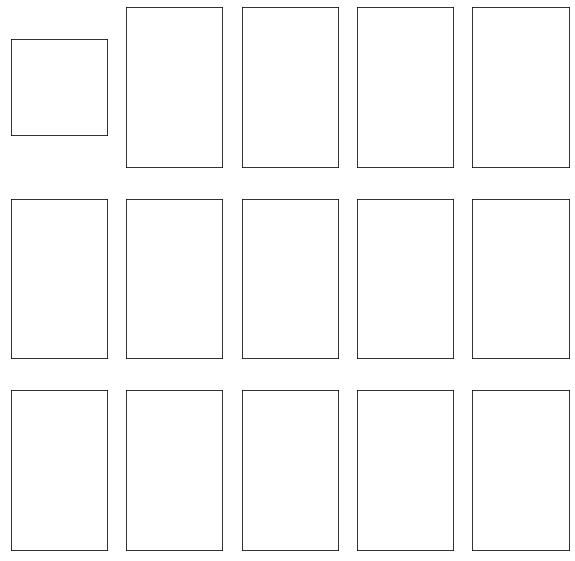

In [11]:
for pca, (row, col), img_shape in zip([makes_pca, crawl_pca], [(3, 5), (5, 3)], [makes_shape, crawl_shape]):
    _, axes = plt.subplots(row, col, figsize=(10, 10), subplot_kw={"xticks": (), "yticks": ()})
    for idx, (ax, component) in enumerate(zip(axes.ravel(), pca.components_)):
        ax.imshow(((component + pca.mean_) / 255.0).reshape(img_shape))
        ax.set_title(f"{idx + 1}th pc")